In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_json(r'D:\University\Semester 5\dwkm-assignment\sarcasm-detection-clustering\Sarcasm_Headlines_Dataset_v2.json',lines = True)

In [4]:
data.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [5]:
df = data.drop('article_link',axis  = 1)

In [6]:
df.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


In [7]:
df.shape

(28619, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
dtypes: int64(1), object(1)
memory usage: 447.3+ KB


In [9]:
df.isnull().sum()

is_sarcastic    0
headline        0
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='is_sarcastic', ylabel='count'>

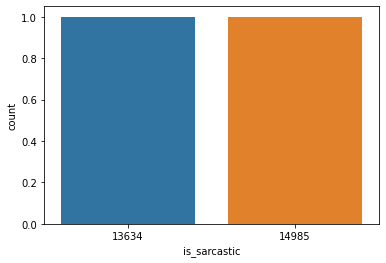

In [10]:
sns.countplot(df['is_sarcastic'].value_counts())

In [11]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
import spacy

In [12]:
nlp = spacy.load('en_core_web_sm')
def preprocess(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    a_lemmas = [lemma.lower() for lemma in lemmas if lemma.isalpha() and lemma not in stopwords.words('english')]
    lemmatized_text = ' '.join(a_lemmas)
    return lemmatized_text

In [13]:
cleaned_text = []
for text in df.headline:
    cleaned_text.append(preprocess(text))
df['clean_text'] = cleaned_text

In [14]:
df.head()

,is_sarcastic,headline,clean_text
0,1,thirtysomething scientists unveil doomsday clo...,thirtysomethe scientist unveil doomsday clock ...
1,0,dem rep. totally nails why congress is falling...,dem rep totally nail congress fall short gende...
2,0,eat your veggies: 9 deliciously different recipes,eat veggie deliciously different recipe
3,1,inclement weather prevents liar from getting t...,inclement weather prevent liar get work
4,1,mother comes pretty close to using word 'strea...,mother come pretty close use word streaming co...


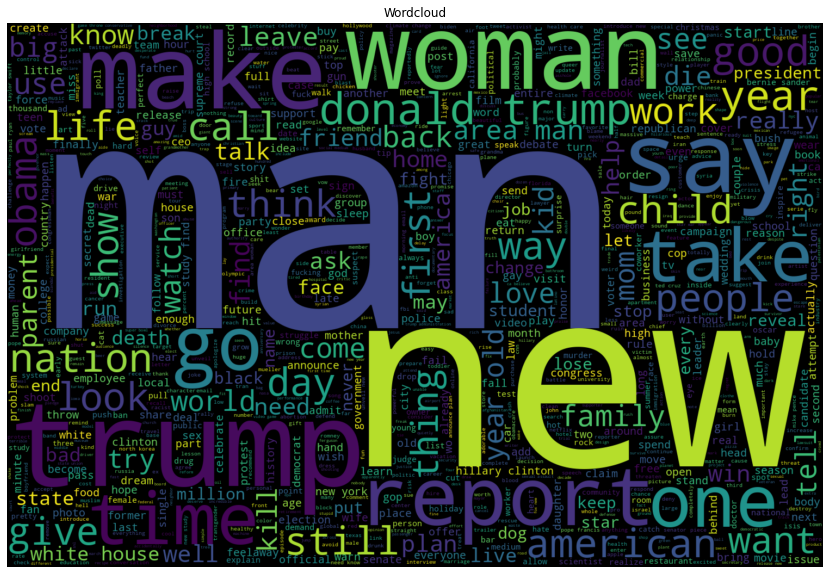

In [15]:
from wordcloud import WordCloud
plt.figure(figsize = (20,10))
wc = WordCloud(width = 1500,height = 1000,max_words = 1000).generate(' '.join(word for word in df.clean_text))
plt.axis("off")
plt.title('Wordcloud')
plt.imshow(wc , interpolation = 'bilinear')

In [16]:
X = df.clean_text
y = df.is_sarcastic

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [20]:
tfidf = TfidfVectorizer(ngram_range = (1,3))
X_tfidf_train = tfidf.fit_transform(X_train.tolist())
X_tfidf_test = tfidf.transform(X_test.tolist())

In [21]:
X_train.head()

12170    american express offer month paternity materni...
28552        watch dolphin knock stand paddleboarder board
6883                          man enjoy thing inform wrong
28387    jonathan lipnicki star young dark helmet space...
12932    publicist worry kanye west support trump damag...
Name: clean_text, dtype: object

**Logistic Regression**

In [22]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_tfidf_train,y_train)

LogisticRegression(class_weight='balanced')

In [23]:
y_pred_lr = lr.predict(X_tfidf_test)
print_metrices(y_pred_lr,y_test)

[[3456  999]
 [ 987 3144]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      4455
           1       0.76      0.76      0.76      4131

    accuracy                           0.77      8586
   macro avg       0.77      0.77      0.77      8586
weighted avg       0.77      0.77      0.77      8586

Accuracy :  0.7686932215234102
Precison :  0.7686727005234562
Recall :  0.7686932215234102
F1 :  0.7686814585725675


**Naive Bayes**

In [24]:
clf_nb = MultinomialNB()
clf_nb.fit(X_tfidf_train,y_train)
y_pred_nb = clf_nb.predict(X_tfidf_test)
print_metrices(y_pred_nb,y_test)

[[3862  593]
 [1239 2892]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      4455
           1       0.83      0.70      0.76      4131

    accuracy                           0.79      8586
   macro avg       0.79      0.78      0.78      8586
weighted avg       0.79      0.79      0.78      8586

Accuracy :  0.7866293966922898
Precison :  0.7991806148029457
Recall :  0.7866293966922898
F1 :  0.7884665092295519


**LinearSVC**

In [25]:
from sklearn.svm import LinearSVC
svc =  LinearSVC(C= 10,random_state=42,class_weight='balanced')
svc.fit(X_tfidf_train,y_train)
y_pred_svc = svc.predict(X_tfidf_test)
print_metrices(y_pred_svc,y_test)

[[3561  894]
 [ 905 3226]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      4455
           1       0.78      0.78      0.78      4131

    accuracy                           0.79      8586
   macro avg       0.79      0.79      0.79      8586
weighted avg       0.79      0.79      0.79      8586

Accuracy :  0.7904728627999068
Precison :  0.7904964384720912
Recall :  0.7904728627999068
F1 :  0.7904833523689271


**Decision Tree**

In [26]:
clf_dt = DecisionTreeClassifier(criterion='gini', splitter = 'best', max_depth=6, random_state=42)
clf_dt.fit(X_tfidf_train, y_train)
y_pred_dt = clf_dt.predict(X_tfidf_test)
print_metrices(y_pred_dt,y_test)

[[4294  161]
 [3316  815]]
              precision    recall  f1-score   support

           0       0.56      0.96      0.71      4455
           1       0.84      0.20      0.32      4131

    accuracy                           0.60      8586
   macro avg       0.70      0.58      0.52      8586
weighted avg       0.69      0.60      0.52      8586

Accuracy :  0.5950384346610762
Precison :  0.8767219638207367
Recall :  0.5950384346610762
F1 :  0.6671781484209868


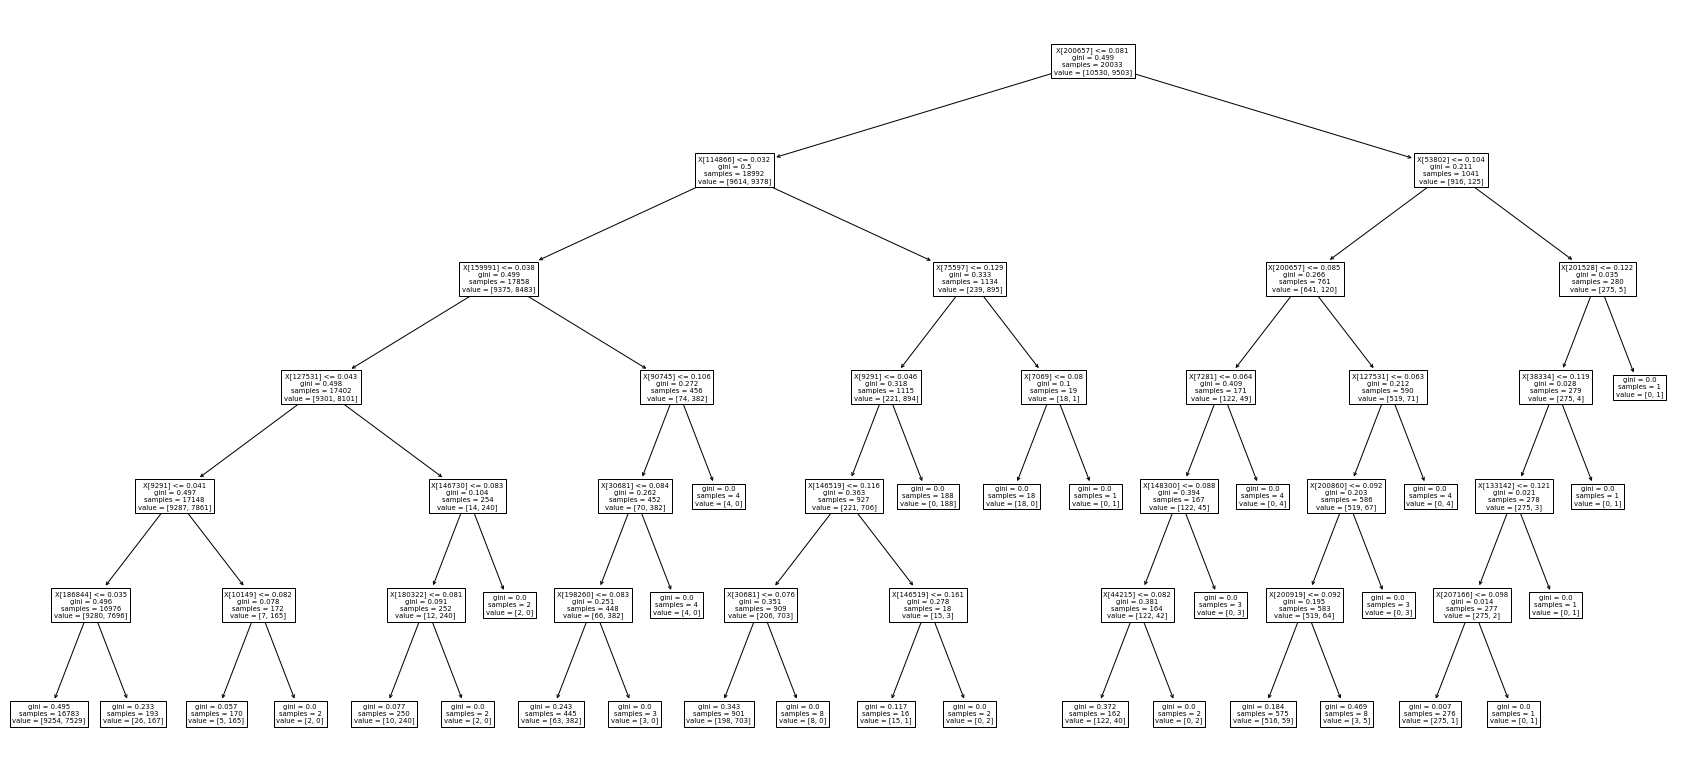

In [27]:
from sklearn import tree
plt.figure(figsize = (30,14))
tree.plot_tree(clf_dt)
plt.show()

**Ensemble Approach**

In [28]:
clf_lr = LogisticRegression(class_weight='balanced')
clf_dt = DecisionTreeClassifier(class_weight='balanced')
clf_rf =   RandomForestClassifier(class_weight='balanced')
clf_svc = SVC(class_weight='balanced')


voting_clf = VotingClassifier(estimators=[('SVC', clf_svc), ('DecisionTree', clf_dt), ('LogReg', clf_lr),('RandromForest', clf_rf)], voting='hard')
voting_clf.fit(X_tfidf_train, y_train)
y_pred_ensemble = voting_clf.predict(X_tfidf_test)

In [29]:
print_metrices(y_pred_ensemble,y_test)

[[3926  529]
 [1770 2361]]
              precision    recall  f1-score   support

           0       0.69      0.88      0.77      4455
           1       0.82      0.57      0.67      4131

    accuracy                           0.73      8586
   macro avg       0.75      0.73      0.72      8586
weighted avg       0.75      0.73      0.72      8586

Accuracy :  0.7322385278360121
Precison :  0.7770053983424586
Recall :  0.7322385278360121
F1 :  0.7395352264728847


In [30]:
acc_table = {
    'Logistic Regression' : accuracy_score(y_pred_lr,y_test),
    'LinearSVC' : accuracy_score(y_pred_svc,y_test),
    'Decision Tree' : accuracy_score(y_pred_dt,y_test),
    'Naive Bayes' : accuracy_score(y_pred_nb,y_test),
    'Ensemble ': accuracy_score(y_pred_ensemble,y_test),
}

In [31]:
acc_df = pd.DataFrame(acc_table.items(),columns = ['Model','Accuracy'])

<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

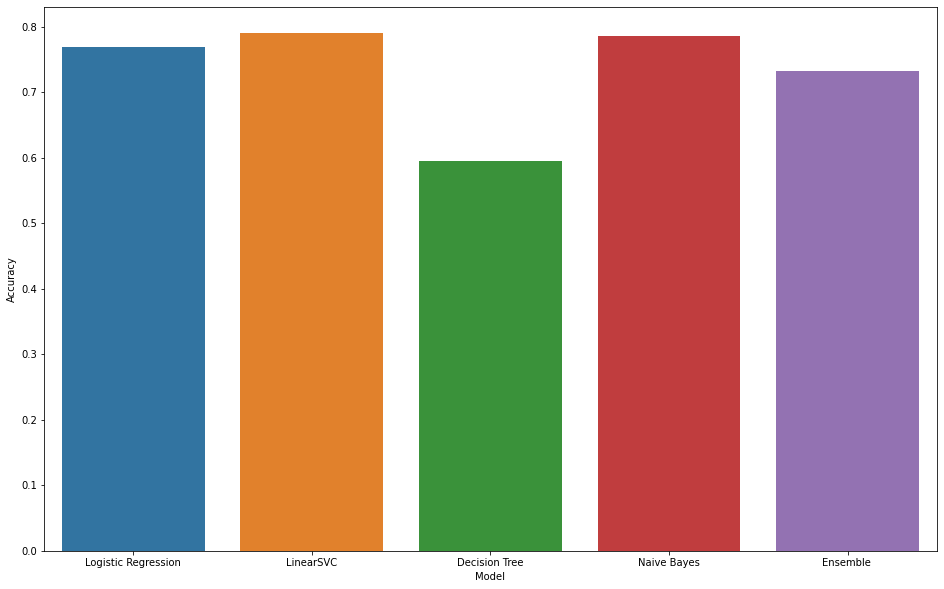

In [32]:
# fig, ax = plt.subplots()
plt.figure(figsize = (16,10))
sns.barplot(x=acc_df['Model'], y=acc_df['Accuracy'], data=acc_df)

**RNN**

In [33]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [34]:
max_words = 1000
max_len = 100
tokenizer = Tokenizer(num_words = max_words,oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded_sequences = pad_sequences(train_sequences,maxlen = max_len,padding = 'post')

test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded_sequences = pad_sequences(test_sequences,maxlen = max_len,padding = 'post')

In [35]:
print(train_sequences[0])
print(train_padded_sequences[0])


[54, 1, 235, 154, 1, 1, 75]
[ 54   1 235 154   1   1  75   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [36]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,GlobalAveragePooling1D
from keras.models import Model
from keras.models import Sequential

In [37]:
import numpy as np
training_padded = np.array(train_padded_sequences)
training_labels = np.array(y_train)
testing_padded = np.array(test_padded_sequences)
testing_labels = np.array(y_test)

In [38]:
vocab_size = 10000
embedding_dim = 16

In [39]:
Model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    GlobalAveragePooling1D(),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])
Model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

2022-01-21 11:10:38.326033: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-21 11:10:38.327243: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-21 11:10:38.327923: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-21 11:10:38.328759: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [40]:
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [41]:
num_epochs = 30
history = Model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

2022-01-21 11:10:46.087169: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
627/627 - 4s - loss: 0.6875 - accuracy: 0.5420 - val_loss: 0.6716 - val_accuracy: 0.6395
Epoch 2/30
627/627 - 2s - loss: 0.6045 - accuracy: 0.6885 - val_loss: 0.5637 - val_accuracy: 0.7070
Epoch 3/30
627/627 - 2s - loss: 0.5194 - accuracy: 0.7444 - val_loss: 0.5257 - val_accuracy: 0.7308
Epoch 4/30
627/627 - 2s - loss: 0.4913 - accuracy: 0.7567 - val_loss: 0.5147 - val_accuracy: 0.7370
Epoch 5/30
627/627 - 2s - loss: 0.4800 - accuracy: 0.7649 - val_loss: 0.5125 - val_accuracy: 0.7399
Epoch 6/30
627/627 - 2s - loss: 0.4727 - accuracy: 0.7688 - val_loss: 0.5133 - val_accuracy: 0.7383
Epoch 7/30
627/627 - 2s - loss: 0.4700 - accuracy: 0.7702 - val_loss: 0.5148 - val_accuracy: 0.7369
Epoch 8/30
627/627 - 2s - loss: 0.4681 - accuracy: 0.7732 - val_loss: 0.5154 - val_accuracy: 0.7358
Epoch 9/30
627/627 - 2s - loss: 0.4652 - accuracy: 0.7716 - val_loss: 0.5152 - val_accuracy: 0.7412
Epoch 10/30
627/627 - 2s - loss: 0.4634 - accuracy: 0.7713 - val_loss: 0.5233 - val_accuracy: 0.7319

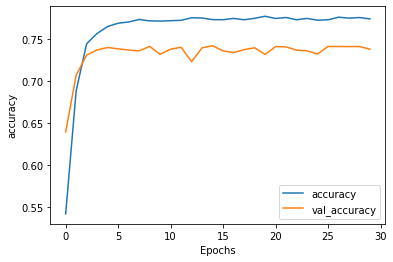

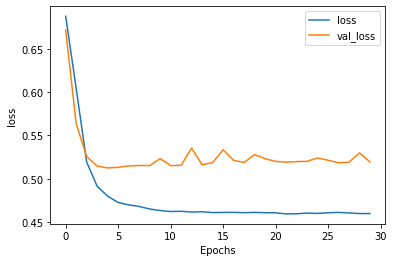

In [42]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")